In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import matplotlib.ticker as ticker

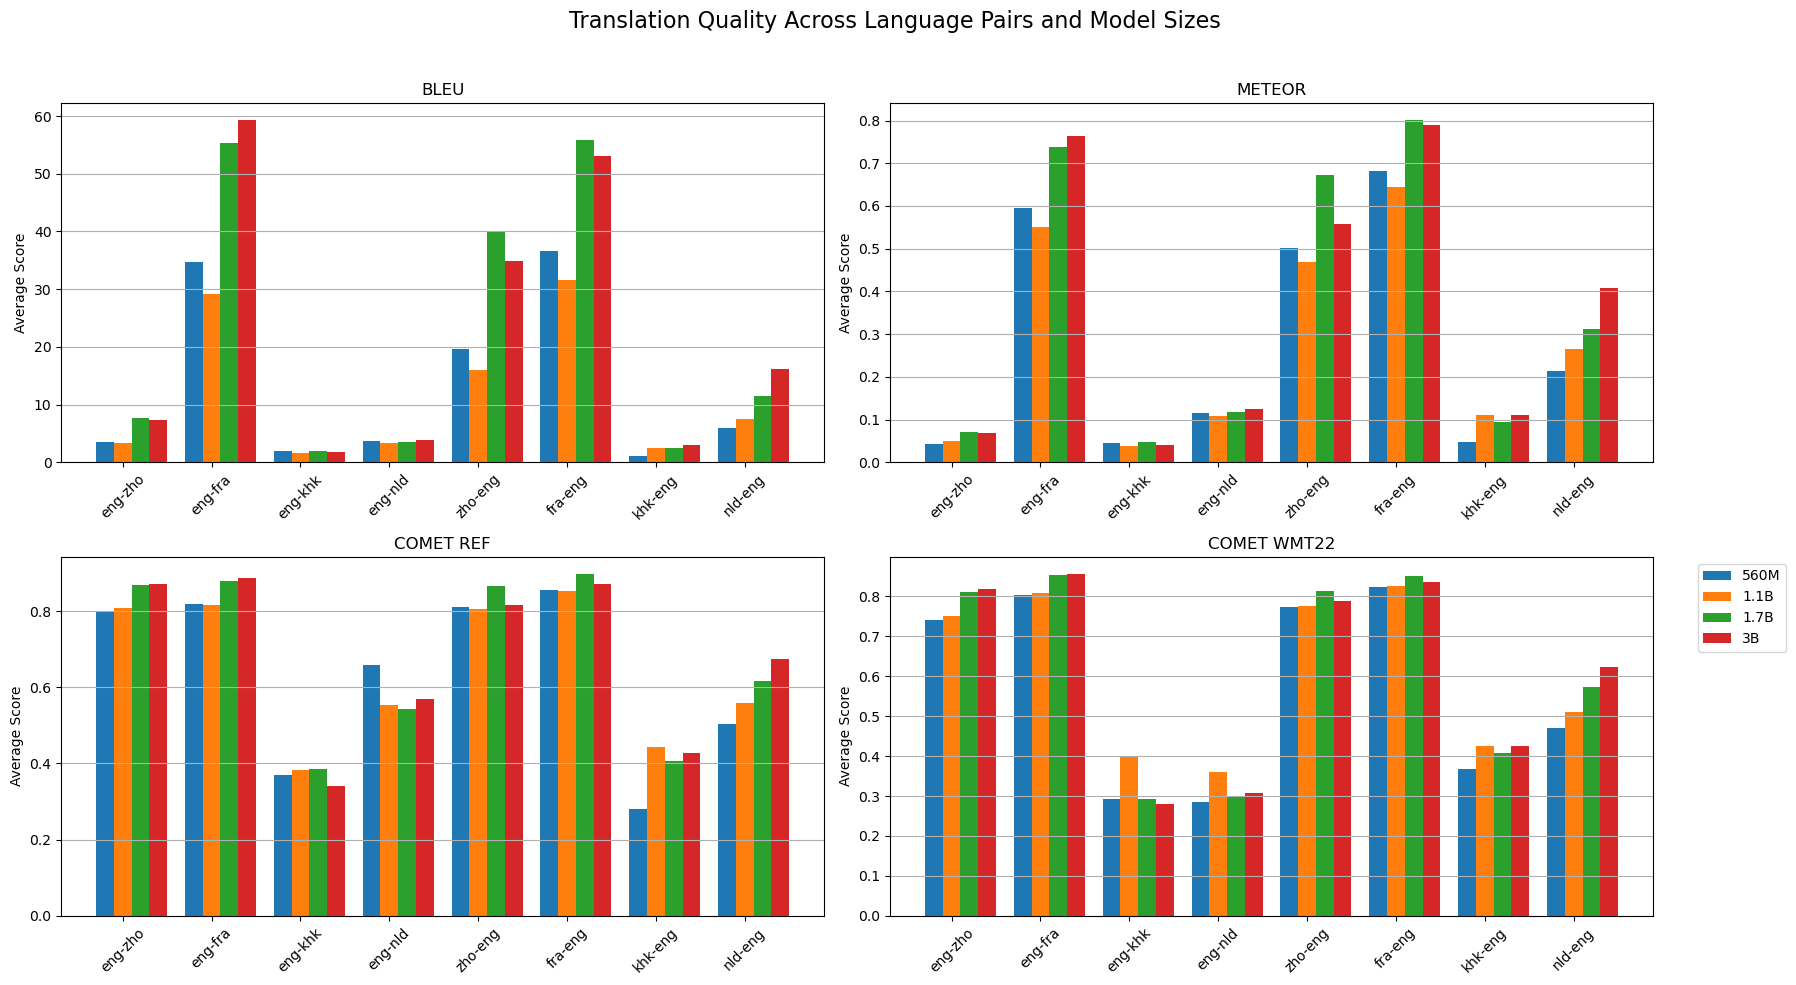

In [2]:
# Setup
model_sizes = ["560", "1b1", "1b7", "3b"]
size_labels = {"560": "560M", "1b1": "1.1B", "1b7": "1.7B", "3b": "3B"}
size_to_folder = {
    "560": "csv_results_560",
    "1b1": "csv_results_1b1",
    "1b7": "csv_results_1b7",
    "3b": "csv_results_3b"
}
lang_pairs = ["eng-zho", "eng-fra", "eng-khk", "eng-nld", "zho-eng", "fra-eng", "khk-eng", "nld-eng"]
metrics = ["bleu", "meteor", "comet_ref", "comet_wmt22"]

# Data
quality_scores = {metric: {lp: [] for lp in lang_pairs} for metric in metrics}
base_path = r"C:\Users\gerri\Documents\jaar3\thesis\exp1"

for size in model_sizes:
    folder = size_to_folder[size]
    for lp in lang_pairs:
        src, tgt = lp.split("-")
        filename = f"{src}-{tgt}_bloomz-{size}_flores200_results.csv"
        file_path = os.path.join(base_path, folder, filename)
        try:
            df = pd.read_csv(file_path)
            sub = df[df["strategy"] == "greedy"]
            if sub.empty:
                for metric in metrics:
                    quality_scores[metric][lp].append(None)
                continue
            for metric in metrics:
                avg_score = sub[metric].mean()
                quality_scores[metric][lp].append(avg_score)
        except FileNotFoundError:
            for metric in metrics:
                quality_scores[metric][lp].append(None)

# Plot
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
fig.suptitle("Translation Quality Across Language Pairs and Model Sizes", fontsize=16)
bar_width = 0.2
x = np.arange(len(lang_pairs))

for idx, metric in enumerate(metrics):
    ax = axes[idx // 2, idx % 2]
    for i, size in enumerate(model_sizes):
        y_vals = [quality_scores[metric][lp][i] if quality_scores[metric][lp][i] is not None else 0 for lp in lang_pairs]
        ax.bar(x + i * bar_width, y_vals, width=bar_width, label=size_labels[size])
    
    ax.set_title(metric.replace("_", " ").upper())
    ax.set_xticks(x + bar_width)
    ax.set_xticklabels(lang_pairs, rotation=45)
    ax.set_ylabel("Average Score")
    ax.grid(True, axis='y')

axes[1, 1].legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [3]:
# LateX
latex_header = r"""\begin{tabular}{lrrrrrrrrrrrrrrrr}
\toprule
 & \multicolumn{4}{r}{560M} & \multicolumn{4}{r}{1.1B} & \multicolumn{4}{r}{1.7B} & \multicolumn{4}{r}{3B} \\
 & BLEU & METEOR & COMET_REF & COMET_WMT22 & BLEU & METEOR & COMET_REF & COMET_WMT22 & BLEU & METEOR & COMET_REF & COMET_WMT22 & BLEU & METEOR & COMET_REF & COMET_WMT22 \\
('Language Pair', '') &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  \\
\midrule
"""

rows = []
for lp in lang_pairs:
    row = [lp]
    for i in range(len(model_sizes)):
        for metric in metrics:
            score = quality_scores[metric][lp][i]
            val = f"{score:.3f}" if score is not None else "-"
            row.append(val)
    rows.append(" & ".join(row) + r" \\")

# Averages
avg_row = ["Average"]
for i in range(len(model_sizes)):
    for metric in metrics:
        vals = [quality_scores[metric][lp][i] for lp in lang_pairs if quality_scores[metric][lp][i] is not None]
        avg = sum(vals) / len(vals) if vals else 0
        avg_row.append(f"{avg:.3f}")
rows.append(" & ".join(avg_row) + r" \\")

latex_footer = r"""\bottomrule
\end{tabular}
"""

latex_table = latex_header + "\n".join(rows) + "\n" + latex_footer
print(latex_table)


\begin{tabular}{lrrrrrrrrrrrrrrrr}
\toprule
 & \multicolumn{4}{r}{560M} & \multicolumn{4}{r}{1.1B} & \multicolumn{4}{r}{1.7B} & \multicolumn{4}{r}{3B} \\
 & BLEU & METEOR & COMET_REF & COMET_WMT22 & BLEU & METEOR & COMET_REF & COMET_WMT22 & BLEU & METEOR & COMET_REF & COMET_WMT22 & BLEU & METEOR & COMET_REF & COMET_WMT22 \\
('Language Pair', '') &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  \\
\midrule
eng-zho & 3.491 & 0.042 & 0.799 & 0.742 & 3.281 & 0.050 & 0.808 & 0.752 & 7.686 & 0.072 & 0.869 & 0.811 & 7.380 & 0.070 & 0.871 & 0.818 \\
eng-fra & 34.721 & 0.595 & 0.820 & 0.804 & 29.126 & 0.550 & 0.815 & 0.809 & 55.281 & 0.738 & 0.880 & 0.853 & 59.243 & 0.764 & 0.888 & 0.856 \\
eng-khk & 1.906 & 0.045 & 0.371 & 0.293 & 1.590 & 0.038 & 0.382 & 0.399 & 1.985 & 0.047 & 0.384 & 0.293 & 1.700 & 0.040 & 0.342 & 0.280 \\
eng-nld & 3.724 & 0.116 & 0.658 & 0.284 & 3.325 & 0.109 & 0.554 & 0.360 & 3.551 & 0.118 & 0.543 & 0.300 & 3.838 & 0.125 & 0.568 & 0.308 \\
zho-eng & 19.598 & 0.501 & 0.810